In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filename = "./video1.mp4"

In [3]:
vid_cap = cv2.VideoCapture(filename)
n_frames = int(vid_cap.get(cv2.CAP_PROP_FRAME_COUNT))

In [4]:
n_frames

1728

In [5]:
vid_ret, vid_frame = vid_cap.read() # np array: (h, w, channels)

vid_frame = cv2.cvtColor(vid_frame, cv2.COLOR_BGR2GRAY)
vid_frame = np.expand_dims(vid_frame, axis=-1)

In [6]:
vid_frame.shape

(1400, 1400, 1)

In [7]:
x1 = 256
y1 = 256
x2 = x1+128
y2 = y1+128

frame = vid_frame[y1:y2,x1:x2]

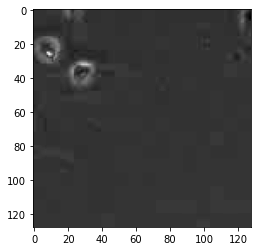

In [8]:
if vid_ret is True:
    plt.imshow(frame, cmap='gray') # "gray", "jet"
    #cv2.imshow(winname="Video", mat=vid_frame)
    #cv2.waitKey(ms)

In [9]:
def get_img_dft(x=None, use_shift=True, use_mag=False):
    # Get DFT of image
    dft = cv2.dft(np.float32(x), flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    mag_spectrum = 10*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))
    
    return mag_spectrum

In [10]:
ft_frame = get_img_dft(x=frame, use_shift=True, use_mag=True)

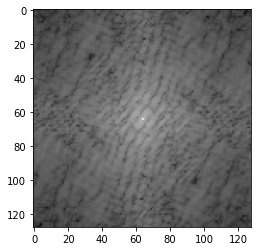

In [11]:
plt.imshow(ft_frame, cmap='gray')

In [12]:
# Cleanup
vid_cap.release()